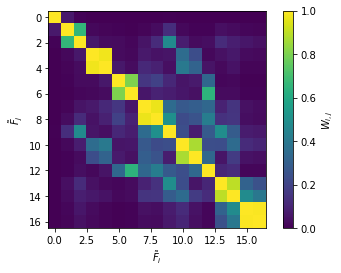

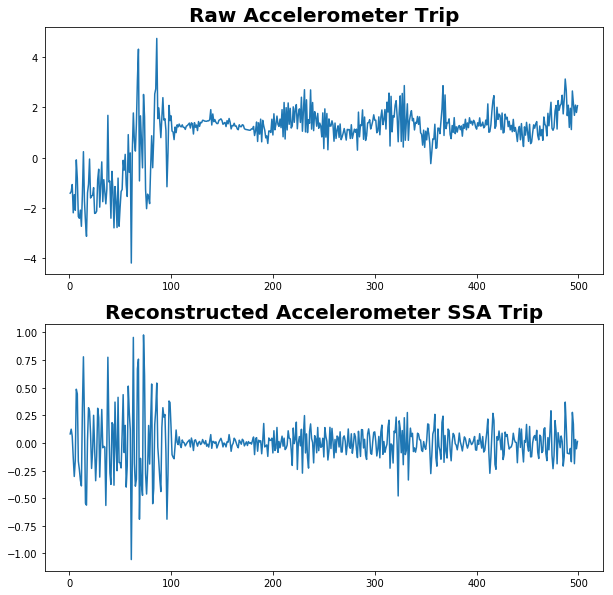

Selected components:  [4, 8, 14, 16]


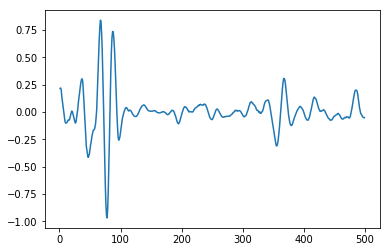

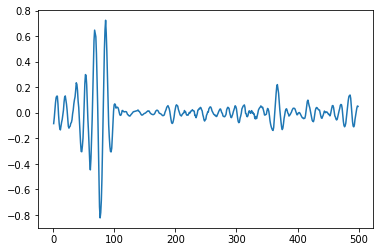

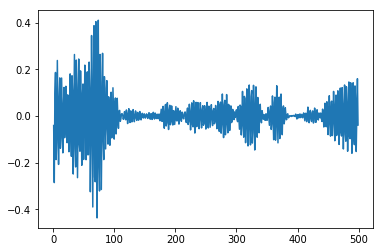

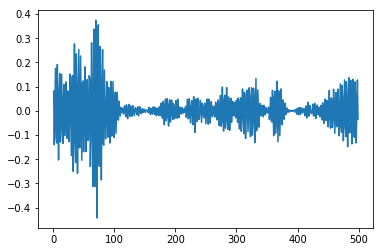

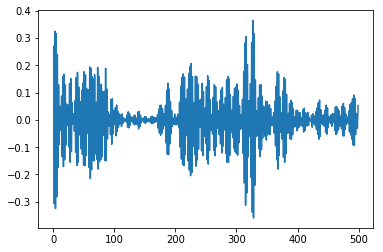

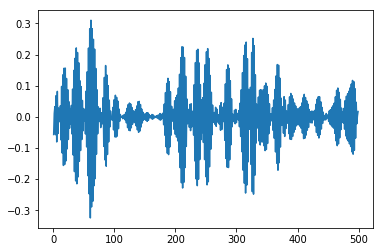

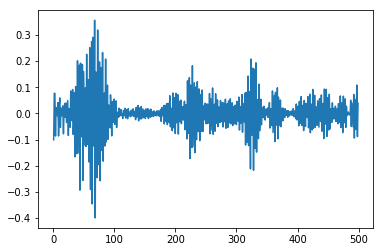

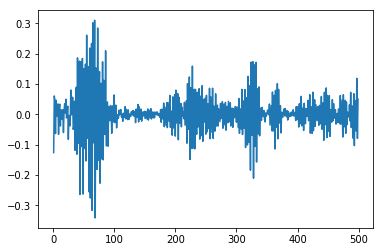

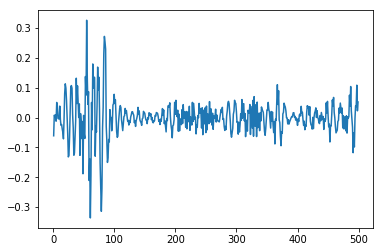

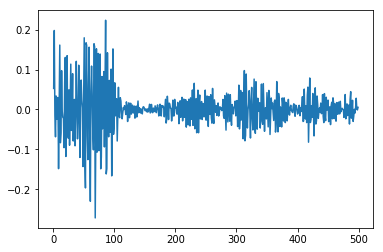

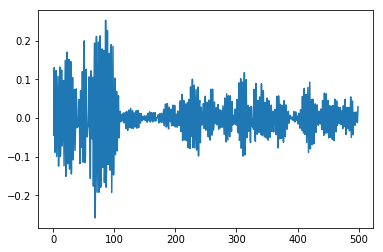

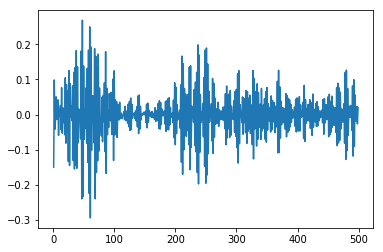

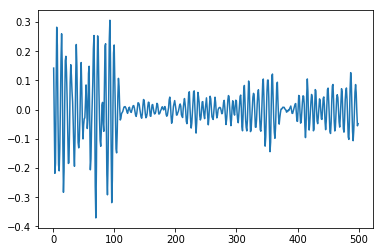

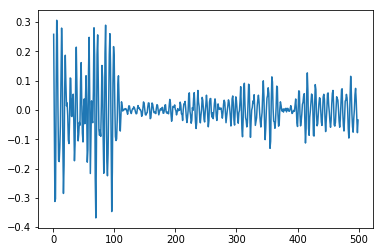

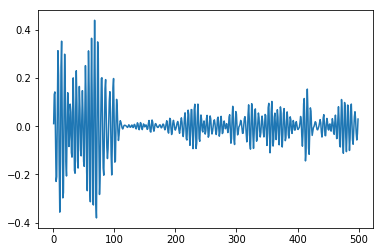

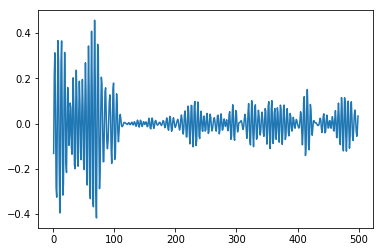

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from os import listdir
from os.path import isfile, join
# Functions contains SSA, SVD (namely Transform), wavelet etc
from functions import specific

path = "data/"
files = [f for f in listdir(path) if isfile(join(path, f))]

mydata = []

for i in files:
    mydata.append(pd.read_csv(path + i, delimiter=r"\s+"))
    
firstTime = True;
accid = [];
gyroid = [];
compassid = [];
for i in range(len(mydata)):
    if any("acc" in s for s in mydata[i].columns.values):
        cl = [col for col in mydata[i].columns if 'acc' in col]
        mydata[i].columns = ['AccX', 'AccY', 'AccZ', 'Time', 'State']
        accid.append(i)
    if any("yr" in s for s in mydata[i].columns.values):
        cl = [col for col in mydata[i].columns if 'acc' in col]
        mydata[i].columns = ["GyroX","GyroY","GyroZ", 'Time', 'State']
        gyroid.append(i)
    if any("ompass" in s for s in mydata[i].columns.values):
        cl = [col for col in mydata[i].columns if 'acc' in col]
        mydata[i].columns = ["CompassX","CompassY","CompassZ", 'Time', 'State']
        compassid.append(i)
alltmp_acc = [element for i, element in enumerate(mydata) if i in accid]
alltmp_acc = pd.concat(alltmp_acc)
alltmp_gyro = [element for i, element in enumerate(mydata) if i in gyroid]
alltmp_gyro = pd.concat(alltmp_gyro)
alltmp_compass = [element for i, element in enumerate(mydata) if i in compassid]
alltmp_compass = pd.concat(alltmp_compass)


# return best + all singular components (in case you need a particular combination
# of componentsyou must request it through function specific)
# Specific function calls SSA class

components = specific(alltmp_acc["AccX"])